In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution1D, Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.initializers import TruncatedNormal
from matplotlib import pyplot as plt

In [7]:
feat_v = np.loadtxt(open("features_voice.csv", "rb"), delimiter=",", skiprows=1)
feat_nv = np.loadtxt(open("features_non_voice.csv", "rb"), delimiter=",", skiprows=1)

In [8]:
print feat_nv.shape
print feat_v.shape

feat_v = np.concatenate((feat_v,np.ones((feat_v.shape[0],1))),axis=1)
feat_nv = np.concatenate((feat_nv,np.zeros((feat_nv.shape[0],1))),axis=1)

feat = np.concatenate((feat_v,feat_nv),axis=0)

del feat_v
del feat_nv

(4272, 17240)
(4855, 17240)


In [24]:
feat2=feat[:,:-1].reshape((-1,431,40))

In [25]:
feat2.shape

(9127, 431, 40)

In [59]:
nb_input_series = 1
nb_filter_1 = 16
nb_filter_2 = 8
filter_length_1 = 4
filter_length_2 = 2
strides = 1
series_length = 431

model = Sequential()
#model.add(Dropout(0.1, input_shape=(series_length,40)))
model.add(Conv1D(filters=nb_filter_1, kernel_size=filter_length_1, strides = strides, activation='relu', input_shape=(series_length, 40)))
model.add(MaxPooling1D())     # Downsample the output of convolution by 2X.
model.add(Conv1D(filters=nb_filter_2, kernel_size=filter_length_2, strides = strides, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
train_len = int(feat.shape[0]*0.9)
hist=model.fit(verbose=2, batch_size=10,x=feat2, y=feat[:,-1].reshape(-1,1),shuffle=True,epochs=30,validation_split=0.1)

Train on 8214 samples, validate on 913 samples
Epoch 1/30
 - 11s - loss: 1.3924 - acc: 0.5638 - val_loss: 0.7246 - val_acc: 0.5915
Epoch 2/30
 - 13s - loss: 0.6333 - acc: 0.6658 - val_loss: 0.6310 - val_acc: 0.6714
Epoch 3/30
 - 11s - loss: 0.5797 - acc: 0.7036 - val_loss: 0.6462 - val_acc: 0.6988
Epoch 4/30
 - 9s - loss: 0.5454 - acc: 0.7441 - val_loss: 0.5841 - val_acc: 0.7141
Epoch 5/30
 - 11s - loss: 0.5156 - acc: 0.7614 - val_loss: 0.6020 - val_acc: 0.7306
Epoch 6/30
 - 8s - loss: 0.4962 - acc: 0.7706 - val_loss: 0.5520 - val_acc: 0.7349
Epoch 7/30
 - 8s - loss: 0.4797 - acc: 0.7770 - val_loss: 0.5840 - val_acc: 0.7393
Epoch 8/30
 - 10s - loss: 0.4670 - acc: 0.7852 - val_loss: 0.6058 - val_acc: 0.7207
Epoch 9/30
 - 9s - loss: 0.4566 - acc: 0.7893 - val_loss: 0.5629 - val_acc: 0.7426
Epoch 10/30
 - 8s - loss: 0.4459 - acc: 0.7913 - val_loss: 0.6082 - val_acc: 0.7306
Epoch 11/30
 - 12s - loss: 0.4388 - acc: 0.7981 - val_loss: 0.6402 - val_acc: 0.7481
Epoch 12/30
 - 11s - loss: 0.428

{'acc': [0.771852933209628,
  0.78646213583247282,
  0.79060140960344816,
  0.79814949855190254,
  0.80484538326334254,
  0.81020208990774156,
  0.81701971796965522,
  0.81994155874384678,
  0.81957632903347988,
  0.81860238231676818,
  0.82761139013571605,
  0.82566349713768084,
  0.83625516969559111,
  0.83528122226048884,
  0.83795957609426952,
  0.84392500047066044,
  0.8419771071823664,
  0.84453371850016756,
  0.84976868232381531,
  0.85390795499906358,
  0.85232529269827528,
  0.85634282293010866,
  0.85634282386619331,
  0.86096907099552444,
  0.86084732669445319,
  0.86072558438165481,
  0.86437788512081537,
  0.86608229249186086,
  0.8680301855624607,
  0.86803018603413129],
 'loss': [0.48470584790049781,
  0.46334776823280327,
  0.45649455038189801,
  0.43323900027956613,
  0.42602833243241589,
  0.4174631992302833,
  0.40979491178574923,
  0.39902990196913385,
  0.40099424759929697,
  0.40132893995992569,
  0.38237782341246918,
  0.38686889451562212,
  0.3684052821790284,
 

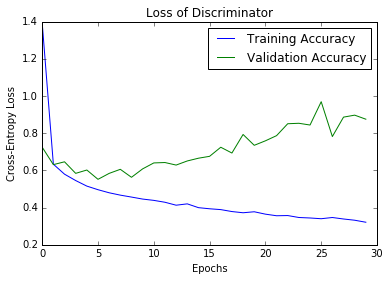

In [66]:
%matplotlib inline

plt.plot(np.arange(30),hist.history['loss'])
plt.plot(np.arange(30),hist.history['val_loss'])

plt.title('Loss of Discriminator')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(['Training Accuracy','Validation Accuracy'],loc=0)
plt.show()